In [2]:
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import os
import cv2
import json
import glob
from tqdm.notebook import tqdm
from torchvision import transforms

C:\Users\ykirc\AppData\Local\Temp\ipykernel_38836\2482818184.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features_dict = torch.load(features_path)


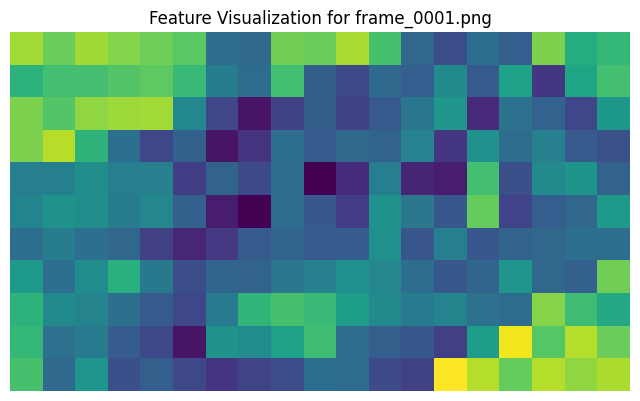

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the features from the .pt file
features_path = "C:\\Users\\ykirc\\Documents\\GitHub\\thesis\\support\\extracted_features\\extr.pt"
features_dict = torch.load(features_path)

# Choose the image you want to visualize (e.g., the first image)
image_key = list(features_dict.keys())[0]  # Select the first image

# Extract the features corresponding to the selected image
feature = features_dict[image_key]

# Convert the feature tensor to a numpy array and normalize it for visualization
feature_np = feature.numpy()

# Rescale the features to the range [0, 1] for visualization
feature_np = (feature_np - feature_np.min()) / (feature_np.max() - feature_np.min())

# Display the feature map
plt.figure(figsize=(8, 8))
plt.imshow(np.mean(feature_np, axis=0))
plt.title(f"Feature Visualization for {image_key}")
plt.axis('off')
plt.show()


C:\Users\ykirc\AppData\Local\Temp\ipykernel_38836\905122223.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file_path)


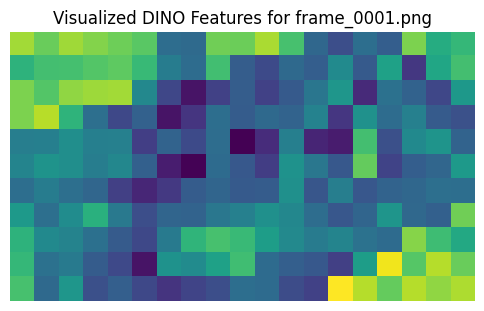

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the .pt file
pt_file_path = "C:\\Users\\ykirc\\Documents\\GitHub\\thesis\\support\\extracted_features\\extr.pt"  # Replace with the actual path to your .pt file
data = torch.load(pt_file_path)

# Get the list of keys (image filenames)
keys = list(data.keys())

# Select the key of the image you want to visualize
# For example, visualize the first image
selected_key = keys[0]

# Get the feature tensor for the selected image
feature_tensor = data[selected_key]

# To visualize the features, we'll take the mean across the channels (for example)
# Alternatively, you can visualize specific channels or apply dimensionality reduction (PCA) if needed
visualized_image = feature_tensor.mean(dim=0).numpy()

# Normalize the visualized image for better display
visualized_image = (visualized_image - visualized_image.min()) / (visualized_image.max() - visualized_image.min())

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(visualized_image, cmap="viridis")
plt.title(f"Visualized DINO Features for {selected_key}")
plt.axis("off")
plt.show()


In [21]:
# Get the list of keys (image filenames)
keys = list(data.keys())

# Select the key of the image you want to visualize
selected_key = keys[0]

# Get the feature tensor for the selected image
feature_tensor = data[selected_key]
feature_tensor.shape

torch.Size([64, 11, 19])

C:\Users\ykirc\AppData\Local\Temp\ipykernel_38836\557454948.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file_path)
Clipping input data to the va

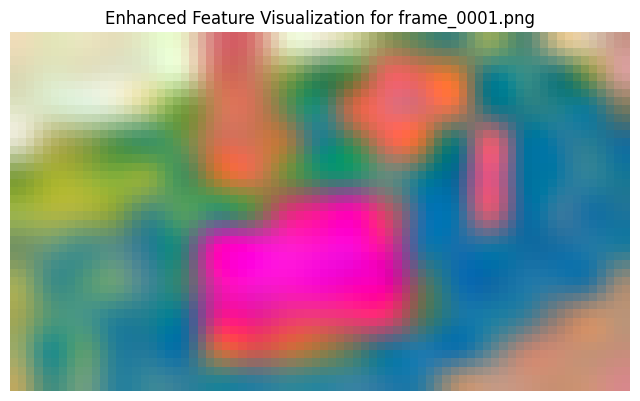

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.ndimage import zoom

# Load the .pt file
pt_file_path = "C:\\Users\\ykirc\\Documents\\GitHub\\thesis\\support\\extracted_features\\extr.pt"
data = torch.load(pt_file_path)

# Get the list of keys (image filenames)
keys = list(data.keys())

# Select the key of the image you want to visualize
selected_key = keys[0]

# Get the feature tensor for the selected image
feature_tensor = data[selected_key]

# Use PCA to reduce dimensionality to 3 for RGB visualization
C, H, W = feature_tensor.shape
feature_tensor_flat = feature_tensor.view(C, H * W).transpose(0, 1).numpy()

pca = PCA(n_components=3)
feature_tensor_pca = pca.fit_transform(feature_tensor_flat)
feature_tensor_pca = feature_tensor_pca.reshape(H, W, 3)

# Normalize for visualization
feature_tensor_pca -= feature_tensor_pca.min()
feature_tensor_pca /= feature_tensor_pca.max()

# Optionally, apply a zoom for better visualization
feature_tensor_pca = zoom(feature_tensor_pca, (4, 4, 1))  # Increase size by a factor of 4

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(feature_tensor_pca)
plt.title(f"Enhanced Feature Visualization for {selected_key}")
plt.axis("off")
plt.show()


C:\Users\ykirc\AppData\Local\Temp\ipykernel_38836\3826340798.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file_path)
Clipping input data to the v

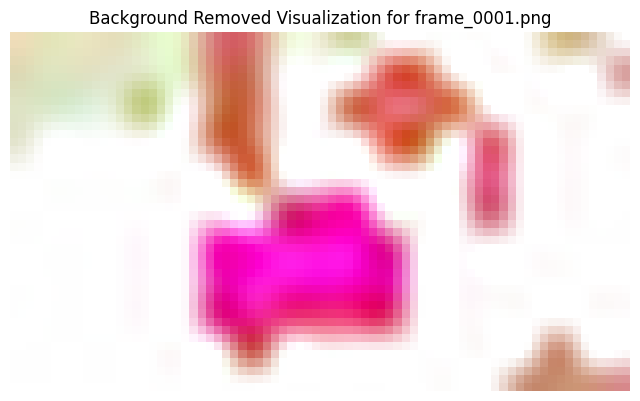

In [43]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.ndimage import zoom

# Load the .pt file
pt_file_path = "C:\\Users\\ykirc\\Documents\\GitHub\\thesis\\support\\extracted_features\\extr.pt"  # Replace with the actual path to your .pt file
data = torch.load(pt_file_path)

# Get the list of keys (image filenames)
keys = list(data.keys())

# Select the key of the image you want to visualize
selected_key = keys[0]

# Get the feature tensor for the selected image
feature_tensor = data[selected_key]

# Use PCA to reduce dimensionality to 3 for RGB visualization
C, H, W = feature_tensor.shape
feature_tensor_flat = feature_tensor.view(C, H * W).transpose(0, 1).numpy()

pca = PCA(n_components=3)
feature_tensor_pca = pca.fit_transform(feature_tensor_flat)
feature_tensor_pca = feature_tensor_pca.reshape(H, W, 3)

# Normalize for visualization
feature_tensor_pca -= feature_tensor_pca.min()
feature_tensor_pca /= feature_tensor_pca.max()

# Apply a threshold to remove the background
# Here, we assume that values below the threshold are background
threshold = 0.78 # Adjust this value based on your image
mask = feature_tensor_pca.max(axis=-1) > threshold

# Apply the mask
feature_tensor_pca[~mask] = 1  # Set background to white

# Optionally, apply a zoom for better visualization
feature_tensor_pca = zoom(feature_tensor_pca, (4, 4, 1))  # Increase size by a factor of 4

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(feature_tensor_pca)
plt.title(f"Background Removed Visualization for {selected_key}")
plt.axis("off")
plt.show()


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.ndimage import zoom
import cv2
import os

# Load the .pt file safely by setting weights_only=True
pt_file_path = "C:\\Users\\ykirc\\Desktop\\input-scenes\\0\\0000d51f\\0000d51f.pt"
data = torch.load(pt_file_path, weights_only=True)

# Set up directories for saving images
output_dir = "visualized_images"
os.makedirs(output_dir, exist_ok=True)

# Iterate through each key in the data
for i, key in enumerate(data.keys()):
    # Get the feature tensor for the current image
    feature_tensor = data[key]

    # Use PCA to reduce dimensionality to 3 for RGB visualization
    C, H, W = feature_tensor.shape
    feature_tensor_flat = feature_tensor.view(C, H * W).transpose(0, 1).numpy()

    pca = PCA(n_components=3)
    feature_tensor_pca = pca.fit_transform(feature_tensor_flat)
    feature_tensor_pca = feature_tensor_pca.reshape(H, W, 3)

    # Normalize for visualization
    feature_tensor_pca -= feature_tensor_pca.min()
    feature_tensor_pca /= feature_tensor_pca.max()

    # Clip values to ensure they are in the range [0, 1]
    feature_tensor_pca = np.clip(feature_tensor_pca, 0, 1)

    # Convert to uint8 format for image saving
    feature_tensor_pca = (feature_tensor_pca * 255).astype(np.uint8)

    # Optionally, apply a zoom for better visualization
    feature_tensor_pca = zoom(feature_tensor_pca, (4, 4, 1))  # Increase size by a factor of 4

    # Save the image
    image_path = os.path.join(output_dir, f"{i:04d}.png")
    plt.imsave(image_path, feature_tensor_pca)

# Create a video from the saved images
video_path = "feature_visualization_video.mp4"
fps = 1  # 1 frame per second

# Get the size of the images
img_array = []
for i in range(len(data.keys())):
    img = cv2.imread(os.path.join(output_dir, f"{i:04d}.png"))
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

# Write the video
out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for img in img_array:
    out.write(img)
out.release()

print(f"Video saved as {video_path}")


Video saved as feature_visualization_video.mp4


In [3]:
pt_file_path = "C:\\Users\\ykirc\\Desktop\\input-scenes\\0\\0000d51f\\0000d51f.pt"
data = torch.load(pt_file_path, weights_only=True)

for key in data.keys():
    print(data[key].shape)

torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])
torch.Size([64, 58, 33])


In [5]:
pt_file_path = "C:\\Users\\ykirc\\Desktop\\extr\\dino.pt"
data = torch.load(pt_file_path, weights_only=True)

for key in data.keys():
    print(data[key].shape)

torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
torch.Size([64, 11, 19])
